### HW
#### Q1
In the theory of probability and statistics, a Bernoulli trial (or binomial trial) is a random experiment with exactly two possible outcomes, "success" and "failure", in which the probability of success is the same every time the experiment is conducted.

1. Genrate Binomial Random number with Probability of .3 for n = 10000 and between 0 and 1
2. In the random number 1 is treated as success, count the number of times we get Success (1) in each n trial.
3. Store the infomation of Success and Failure and Success Rate for each set of n trials.
4. Repeat the set 100 times, and then we will 100 Success data points from each trails.
5. Calcaulte the Confidence Interval of 95% from this data set.

In [2]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/matplotlib/font_manager.py:229: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


In [10]:
# Count number of success and Failure 
n , p = 10000, .3 # n=# number of trials
results=np.array([])
resultf=np.array([])
for i in range(0,100):
    sam= np.random.binomial(1, p,n)
    success = 0
    faiure =0
    for s in sam:
        if (s==1):
#             print("i",s,"..........",i)
            success = success+ 1
        else:
            faiure = faiure + 1
            
    results= np.append(results,success)
    resultf= np.append(resultf,faiure)

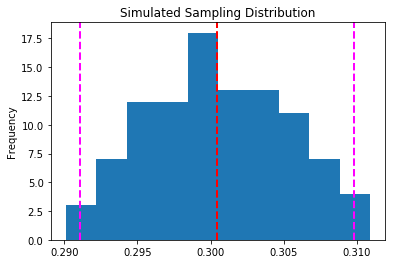

Sampling Mean: 0.30043499999999995
Sampling Std Deviation: 0.004766854732462911
95% Confidence Interval: (0.29109213640483833, 0.3097778635951616)


In [11]:
dfExp = pd.DataFrame({'Success': results,'Failure':resultf,'SRate':results/n})
# Get the Mean, StdDev, and 95% CI of the means
# means = df['mean']
m = dfExp.SRate.mean()
sd = dfExp.SRate.std()
ci = stats.norm.interval(0.95, m, sd)
    

# Plot the distribution, mean, and CI
dfExp.SRate.plot.hist(title='Simulated Sampling Distribution') 
plt.axvline(m, color='red', linestyle='dashed', linewidth=2)
plt.axvline(ci[0], color='magenta', linestyle='dashed', linewidth=2)
plt.axvline(ci[1], color='magenta', linestyle='dashed', linewidth=2)
plt.show()

# Print the Mean, StdDev and 95% CI
print ('Sampling Mean: ' + str(m))
print ('Sampling Std Deviation: ' + str(sd))
print ('95% Confidence Interval: ' + str(ci))

True value of .3 is included within the confidence limits. (0.2911, 0.3098)

In [14]:
# Determine how many of the 100 experiments fall within the confidence interval
pthree = len(dfExp[(dfExp.SRate <= 0.3086106238190816) &(dfExp.SRate >= 0.29136937618091835)])
print("True value of .3 is included within the confidence limits =",pthree)

True value of .3 is included within the confidence limits = 94


#### Q2
Calculate the expected value and variance of the binomial distribution using the moment generating function.

For n independent Binomial trials, each of which has probability of success p and probability of failure 1 - p.
$$ \\
p(1) = p \\
p(0) = 1 - p  \\\textrm{For Random Varaible X, of the Binomial distribution the Moment Genrating Fucntion would be :} $$

$$ M_X(t)= E(e^{tx}) \\
\textrm{For any X in the time t, the moment genrating fucntion would be :}
=\sum_{all X}^n e^{tx}p_X(x)..... \textrm{here (x)  is probability of E(X)}\\
\textrm{ Enterting the probability of 0 and 1 i.e. success and Failure.}\\
= e^{t*0}p_X(0) + e^{t*1}p_X(1)\\
= e^{0}(1-p) + e^{t}p \\
\textrm{ since  e^{0} = 1, Moment genrating function would be: }\\
= (1-p) + e^{t}p 
$$




Using MGF to find the Var(X)
$$ \textrm{Using MGM to find the Var(X)} \\
var(X)= E(X^{2})- M_{1}(E_X)^2 \textrm{ i.e. 2nd Moment - square of 1st Moment} \\
\textrm{ We will Calculate }  M_{1}(E_X) \ and \ M_{2}(E_X) \textrm{ and then evaluate each of them at t = 0.}\\ \\
E(X) = \frac{d}{dt} M_X(t) |_{t=0}
=>\frac{d}{dt}\lbrack (1-p) + e^{t}p  \rbrack |_{t=0} \\
=> e^{t}p |_{t=0} \\
=> p \cdots\cdots\cdots \cdots\cdots\cdots E(X)\\
\textrm{ Similarly E(X^2), can be calculated } \\
E(X^2) = \frac{d_2}{dt^2} M_X(t) |_{t=0} \\
=>\frac{d}{dt}\lbrack (1-p) + e^{t}p  \rbrack |_{t=0} \\
=> e^{t}p |_{t=0} \\
=> p \cdots\cdots\cdots \cdots\cdots\cdots E(X^2)\\
\\ \\ \\
\textrm{Varaince of the Binomial Distribution =} Var(X) = p - p^2 \\
= p(1-p)
$$ 




If we toss 100 coins, and X is the number of heads, the expected value of X is 50 = (1/2)100, we  will try to prove this with MGF.

$$ \textrm{Moment Genrating fucnation of all n would be} \sum_{all X}^n M_X(t)= E(e^{t\sum_{i=1}^n X_i} ) \\
=E(e^{t\sum_{i=1}^n x_1} ,e^{t\sum_{i=1}^n x_2}, e^{t\sum_{i=1}^n x_3}....e^{t\sum_{i=1}^n x_n} )  \\
=E(e^{t\sum_{i=1}^n x_1})* E(e^{t\sum_{i=1}^n x_2} )....E(e^{t\sum_{i=1}^n x_n} )  \textrm{......since each X_i is independent} \\
= [(1-p) + e^{t}p][(1-p) + e^{t}p]...[(1-p) + e^{t}p ]   \textrm {.........since we know E(x) (1-p) + e^{t}p  } \\
= [(1-p) + e^{t}p ]^n => [M_X(t)]^n \\
\textrm{ Finiding the Expected value } \\ 
E(\sum_{i=1}^n X_i) =  \frac{d}{dt}[(1-p) + e^{t}p ]^n  \space |_{t=0}   \\
= n(1-p+pe^t)^{n-1} * pe^t |_{t=0}   \\
= n( 1- p + p)p => np \textrm { ..........which is the expected value of Binomial Distribution} \\
\textrm E((\sum_{i=1}^n X_i)^2) = \frac{d^2}{dt^2} (E(\sum_{i=1}^n X_i)) \space |_{t=0} \\
= \frac{d^2}{dt^2} n(1-p+pe^t)^{n-1} * pe^t  \space |_{t=0}
=n(n-1)(1- p + pe^t)^{n-2}(pe^t)^2 \space |_{t=0}
= n*p^2-n*p^2+n*p \\ \\ 
\textrm {Varinace =} \sum_{}^n X_i =  n*p^2-n*p^2+n*p - (np)^2 \\
= np(1-p)
$$



#### Q3
Calculate the expected value and variance of the exponential distribution using the moment generating function.

The probability density function (pdf) of an exponential distribution is:

$$ f(x,\lambda) = \begin{cases}
 & \lambda e^{-\lambda x}  \cdots (x \ge 0) \\
 & 0 \cdots (x\le 0) 
\end{cases} \\
\textrm{The mean or expected value of an exponentially distributed random variable X with rate parameter λ is given by} \\
E[X] = \frac{1}{\lambda}
 $$



Moment generating function of X.:
$$ M_X(t)= E(e^{tx}) \\ 
$$
Let X be a continuous random variable which can take 
$$ R_X = 0 , inf \\
M_X(t) = E(e^{tx}) = \int_{0}^{Inf} (e^{tx})f_x(X)dx  \cdots \textrm{ MGF function * probability of all the X integrated from 0 to Inf}\\
= \int_{0}^{Inf} (e^{tx})\lambda e^{-\lambda x}  dx   \cdots \textrm{ f_x(X) =\lambda e^{-\lambda x} } \\
= \lambda \int_{0}^{Inf} e^{tx} e^{-\lambda x} \\
= \lambda \int_{0}^{Inf} e^{tx-\lambda x} \\
= \lambda \int_{0}^{Inf} e^{x(t-\lambda x)} \\
= \lambda \left [ \frac{1}{t-\lambda} e^{x(t-\lambda x)}  \right ]_{0}^{Inf}
= \frac{\lambda }{\lambda -t}
$$

Now we will put the MGF to E(X`) 
$$
𝑀_𝑋(𝑡) = \frac{𝜆}{𝜆−𝑡} \\
\textrm{The expected value of X can be computed by taking the first derivative of the mgf, and and evaluating it at t=0 } \\
E(X_1)= \frac{d}{dt}𝑀_𝑋(𝑡) \\
=\frac{d}{dt} 𝑀_𝑋(𝑡) \left |_{t=0} \right . \\
=\frac{d}{dt} \frac{𝜆}{𝜆−𝑡} \left |_{t=0} \right .  \\
=𝜆\frac{d}{dt} (\frac{1}{𝜆−𝑡})^{1} \left |_{t=0} \right .  \\
=𝜆\left [(\frac{1}{𝜆−𝑡})^{2} \right ]_{t=0} \\
= 𝜆 (\frac{1}{𝜆−0})^{2}  \textrm{ After Evaluating t=0}\\
= \frac{𝜆 }{𝜆^2} \\
E(X_1)=  \frac{1}{𝜆} \\ \\ \\
\textrm{The second moment of X can be computed by taking the second derivative of the mgf:} \\
E(X_2)= \frac{d^2}{dt^2}𝑀_𝑋(𝑡) \\
= \frac{d^2}{dt^2}  𝑀_𝑋(𝑡) \left |_{t=0} \right . \\
= \frac{d^2}{dt^2}  \frac{𝜆}{𝜆−𝑡} \left |_{t=0} \right .  \\
= \frac{d}{dt} 𝜆\left ((\frac{1}{𝜆−𝑡})^{2} \right ) \left |_{t=0} \right . \\
=  𝜆\frac{d}{dt}  \left ((\frac{1}{𝜆−𝑡})^{2} \right ) \left |_{t=0} \right . \\
=  2𝜆 \left [  \left ((\frac{1}{𝜆−𝑡})^{3} \right ) \right ]_{t=0} \\ \textrm{and evaluating it at $t=0$:}\\
= \frac{2𝜆}{{𝜆−𝑡}^3} \\
= \frac{2𝜆}{{𝜆−0}^3} = \frac{2𝜆}{{𝜆}^3} \\
E(X_2)= \frac{2}{{𝜆}^2} \\
\textrm{The Variance can be calculated by taking difference of 2nd MFG and sqr(1st MGF) expected value of X : }\\
$$

$$ Varinace(X)= E(X_2) - (E(X_1))^2 \\
=  \frac{2}{{𝜆}^2}  - ( \frac{1}{𝜆} )^2 \\
= \frac{1}{{𝜆}^2}$$